## 1. Write a Python code to draw a normal Q-Q plot for univariate variables. Among many methods, use the method discussed in class.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt

C:\Users\soyou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\soyou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Q-Q plot 출력 함수

def qqplot(size, samples):
    a = list(range(1,size+1, 1))
    percent = (np.array(a) - np.ones(len(a))*1/2) / len(a)
    q = norm.ppf(percent)
    
    fig, ax = plt.subplots()
    ax.scatter(q, samples)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = 'red')
    
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title('QQ Plot')
    
    return plt.show()

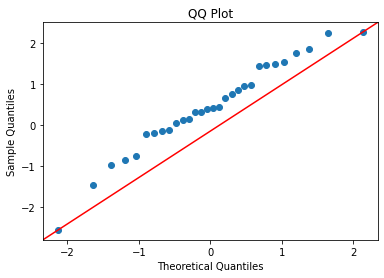

In [3]:
# 랜덤하게 생성한 샘플에 대한 qqplot 

np.random.seed(0)
samples = np.random.normal(0,1,30)
samples.sort()

qqplot(30, samples)

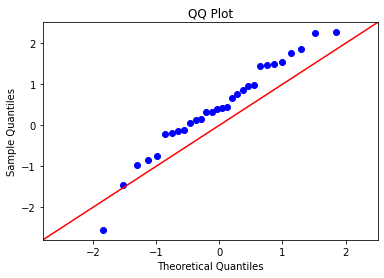

In [4]:
# statsmodel 패키지의 Q-Q plot 내장 함수와의 비교

sm.qqplot(samples, line="45")
plt.title('QQ Plot')
plt.show()

## 2.A morning newspaper lists the following used-car prices for a foreign compact with age x1 measured in years and selling price x2 measured in thousands of dollars:

In [5]:
# 데이터 입력

x1 = np.array([3, 5, 5, 7, 7, 7, 8, 9, 10, 11])
x2 = np.array([2.3, 1.9, 1.0, 0.7, 0.3, 1.0, 1.05, 0.45, 0.7, 0.3])

### a. Determine a Box-Cox transformation for x1 using Python function.

In [6]:
# x1의 Box-Cox lambda 계산

x_most_normal_1, lmbda_optimal_1 = stats.boxcox(x1)
print("Box-Cox lambda for x1 : {}".format(lmbda_optimal_1))
print("Transformed x1 by Box-Cox : {}".format(x_most_normal_1))

Box-Cox lambda for x1 : 0.9950293497559268
Transformed x1 by Box-Cox : [1.99357154 3.97994271 3.97994271 5.96225561 5.96225561 5.96225561
 6.95229389 7.9417156  8.93058988 9.91897192]


### b. Determine a Box-Cox transformation for x2 using Python function.

In [7]:
# x2의 Box-Cox lambda 계산

x_most_normal_2, lmbda_optimal_2 = stats.boxcox(x2)
print("Box-Cox lambda for x2 : {}".format(lmbda_optimal_2))
print("Transformed x2 by Box-Cox : {}".format(x_most_normal_2))

Box-Cox lambda for x2 : 0.0003479745820106328
Transformed x2 by Box-Cox : [ 0.83302984  0.64192557  0.         -0.35665281 -1.20372064  0.
  0.04879058 -0.79839677 -0.35665281 -1.20372064]


### c. Construct Q-Q plots for x1^lambda and x2^lambda, respectively, using Python code in #1.

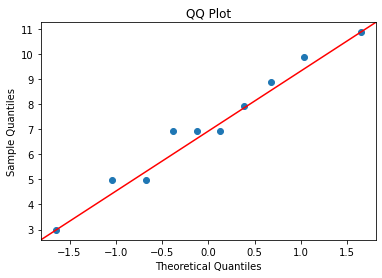

In [8]:
# Box-Cox lambda를 사용한 x1의 power transformation 및 Q-Q plot

# Power transformation
x1_transformed = np.array([i**lmbda_optimal_1 for i in x1])
x1_transformed.sort()

# Q-Q plot using python code in #1
qqplot(len(x1_transformed), x1_transformed)

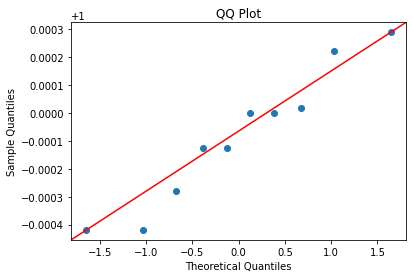

In [9]:
# Box-Cox lambda를 사용한 x2의 power transformation 및 Q-Q plot

# Power transformation
x2_transformed = np.array([i**lmbda_optimal_2 for i in x2])
x2_transformed.sort()

# Q-Q plot using python code in #1
qqplot(len(x2_transformed), x2_transformed)

## 3. Write a Python code to draw a chi-square plot for multivariate variables. Use the method introduced in class.

In [10]:
# chi-square plot 출력 함수

def chisquareplot(data):
    
    # Calculate the squared generalized distances 
    d_list = []
    for i in range(len(data)) :
        mean_v = data.mean()
        v = data.iloc[i,:] - mean_v
        s = np.subtract(data, mean_v.transpose())
        cov_v = s.transpose().dot(data) / (len(data)-1)
        cov_inv = np.linalg.inv(cov_v)
        d = v.T @ cov_inv @ v
        d_list.append(d)
        d_list.sort()
    
    # Calculate probability values
    size = len(data)
    a = list(range(1,size+1, 1))
    percent = (np.array(a) - np.ones(len(a))*1/2) / len(a)
    
    # Calculate quantiles of theoretical chi-square distribution
    q = stats.chi2.ppf(percent, data.shape[1])
    
    # Plot the pairs
    fig, ax = plt.subplots()
    ax.scatter(q, d_list)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = 'red')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title('Chi-square Plot')
    return plt.show()

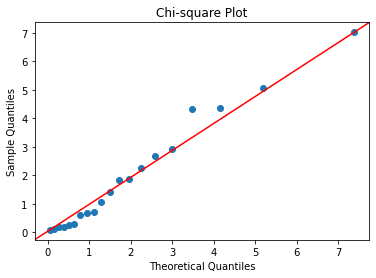

In [11]:
# 가상의 데이터 생성하여 함수 테스트

np.random.seed(0)
x1 = np.random.randn(20)
x2 = np.random.randn(20)

data = {'x1': x1, 'x2': x2}
df = pd.DataFrame(data)

chisquareplot(df)

## 4. Using the data ‘college.dat’ (described in Table 5.2 of the textbook), construct a chi-square plot using Python code in #3. Comment on the multivariate normality of the three variables.

In [12]:
# 데이터 불러오기

college = pd.read_csv('college.dat', header = None, delim_whitespace = True)
college.columns = ['social', 'verbal', 'science']
college

,social,verbal,science
0,468,41,26
1,428,39,26
2,514,53,21
3,547,67,33
4,614,61,27
...,...,...,...
82,614,70,23
83,527,49,30
84,474,41,16
85,441,47,26


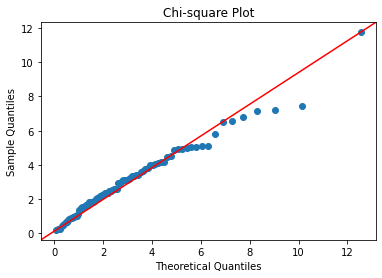

In [13]:
# chi-square plot 출력

chisquareplot(college)

In [14]:
# 정규성 검정 
# Shapiro-Wilk test

stat, p = stats.shapiro(college.social)
print("social - statistic = %.3f, p-value = %.10f" % (stat,p))

stat, p = stats.shapiro(college.verbal)
print("verbal - statistic = %.3f, p-value = %.10f" % (stat,p))

stat, p = stats.shapiro(college.science)
print("science - statistic = %.3f, p-value = %.10f" % (stat,p))

social - statistic = 0.989, p-value = 0.6860619783
verbal - statistic = 0.970, p-value = 0.0387210958
science - statistic = 0.987, p-value = 0.5357581973


In [15]:
# 정규성 검정 
# Kolmogorov-Smirnov test
m = np.mean(college.social)
s = np.std(college.social)
stat, p = stats.kstest(college.social, 'norm', args = (m, s))
print("social - statistic = %.3f, p-value = %.10f" % (stat,p))

m = np.mean(college.verbal)
s = np.std(college.verbal)
stat, p = stats.kstest(college.verbal, 'norm', args = (m, s))
print("verbal - statistic = %.3f, p-value = %.10f" % (stat,p))

m = np.mean(college.science)
s = np.std(college.science)
stat, p = stats.kstest(college.science, 'norm', args = (m, s))
print("science - statistic = %.3f, p-value = %.10f" % (stat,p))

social - statistic = 0.096, p-value = 0.3812478074
verbal - statistic = 0.082, p-value = 0.5755493809
science - statistic = 0.078, p-value = 0.6323082663
